<a href="https://colab.research.google.com/github/Lee-Gahyeon0/OSS-learn/blob/main/Netflix_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix 데이터 분석하기**
kaggle에 있는 Netflix의 모든 영화 및 TV 프로그램에 대한 메타 데이터 분석및 시각화

In [20]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [21]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['netflix_titles (1).csv'].decode('utf-8')))

df.head(3)
df.info()
print(" ")
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data exploration
불러온 넷플릭스의 데이터의 유형 및 결측치 비율 확인 후, 결측치 처리, 갯수를 확인한다.   
   이후 연도, 월 정보 추출 후 결측치를 처리해  Movie & TV show 비율 과 연도별/월별 Movie & TV show 수치 시각화 한다.

In [22]:
# prompt: 불러온 넷플릭스의 데이터의 유형, 결측치 비율 확인, 결측치 처리, 결측지 갯수 확인

# 데이터 유형 확인
print(df.dtypes)
print("\n")

# 결측치 비율 확인
print("결측치 비율:")
print(df.isnull().mean() * 100)
print("\n")

# 결측치 처리  (삭제)
df.dropna(inplace=True)

# 결측치 개수 확인
print("결측치 개수:")
print(df.isnull().sum())

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


결측치 비율:
show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


결측치 개수:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [33]:
import pandas as pd
# 데이터 유형 확인
print(df.dtypes)
print("\n")

# 결측치 비율 확인
print("결측치 비율:")
print(df.isnull().mean() * 100)
print("\n")

# 결측치 처리 (삭제 대신 다른 처리 방식 적용)
# 예시: director 컬럼의 결측치를 'Unknown'으로 채우기
df['director'].fillna('Unknown', inplace=True)
# 예시: cast 컬럼의 결측치를 'No Cast'으로 채우기
df['cast'].fillna('No Cast', inplace=True)
# 예시: country 컬럼의 결측치를 'Unknown Country'으로 채우기
df['country'].fillna('Unknown Country', inplace=True)
# date_added 컬럼을 datetime 형식으로 변환하고 연도, 월 정보 추출 후 결측치 처리
# format='%B %d, %Y' 대신 format='mixed'를 사용하여 다양한 형식을 처리
# errors='coerce'를 사용하여 변환 오류 발생 시 NaT(Not a Time) 값으로 대체

df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
# year_added, month_added 컬럼의 결측치를 0으로 채우기
df['year_added'].fillna(0, inplace=True)
df['month_added'].fillna(0, inplace=True)


# 결측치 개수 확인
print("결측치 개수:")
print(df.isnull().sum())

# 처리된 데이터 확인
display(df.head())


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


결측치 비율:
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


결측치 개수:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


<ipython-input-33-3923ddba19de>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-33-3923ddba19de>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9


In [34]:
# prompt: # rating 필드의 값 파악
# df['rating'].unique()
# # 2. 시청 등급 설명표를 참고하여 넷플릭스의 rating 필드를 이용한 age_group 필드 생성
# # df['age_group']를 생성하여 df['rating'] 값 삽입
# # age_group 필드에 딕셔너리로 시청 등급에 대한 key, value 선언
# # .map( ) : 사전에 정의한 내용을 필드에 적용

# rating 필드의 값 파악
print(df['rating'].unique())

# 시청 등급 설명표를 참고하여 넷플릭스의 rating 필드를 이용한 age_group 필드 생성
# df['age_group']를 생성하여 df['rating'] 값 삽입
# age_group 필드에 딕셔너리로 시청 등급에 대한 key, value 선언
# .map( ) : 사전에 정의한 내용을 필드에 적용
age_group_mapping = {
    'TV-MA': 'Adult',
    'R': 'Adult',
    'PG-13': 'Teen',
    'TV-14': 'Teen',
    'TV-PG': 'Older Kids',
    'PG': 'Older Kids',
    'TV-Y7': 'Younger Kids',
    'TV-Y': 'Younger Kids',
    'TV-G': 'Kids',
    'G': 'Kids',
    'NC-17': 'Adult',
    'NR': 'Not Rated',
    'UR': 'Not Rated',
    'TV-Y7-FV': 'Older Kids',
    '74 min': 'Not Rated',  # '74 min'은 rating이 아닌 것으로 판단, 'Not Rated'로 처리
    '84 min': 'Not Rated',  # '84 min'은 rating이 아닌 것으로 판단, 'Not Rated'로 처리
    '66 min': 'Not Rated'   # '66 min'은 rating이 아닌 것으로 판단, 'Not Rated'로 처리
}

df['age_group'] = df['rating'].map(age_group_mapping)

# age_group 필드 확인
print(df['age_group'].unique())


['TV-MA' 'TV-14' 'PG-13' 'PG' 'R' 'TV-PG' 'G' 'TV-Y7' 'TV-G' 'TV-Y'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']
['Adult' 'Teen' 'Older Kids' 'Kids' 'Younger Kids' 'Not Rated']


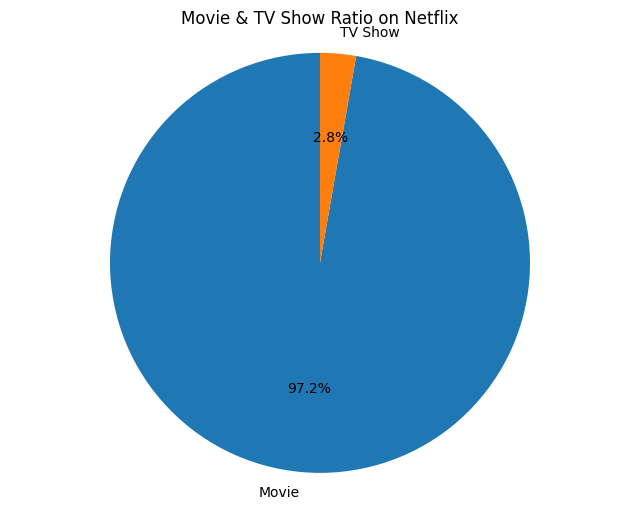

In [29]:
# prompt: 입력된 데이터 이용해 Movie & TV show 비율 시각화

import matplotlib.pyplot as plt

# 'type' 컬럼을 기준으로 영화와 TV 프로그램의 개수를 계산합니다.
type_counts = df['type'].value_counts()

# 파이 차트를 생성합니다.
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Movie & TV Show Ratio on Netflix')
plt.axis('equal')  # 원형으로 보이도록 설정합니다.
plt.show()


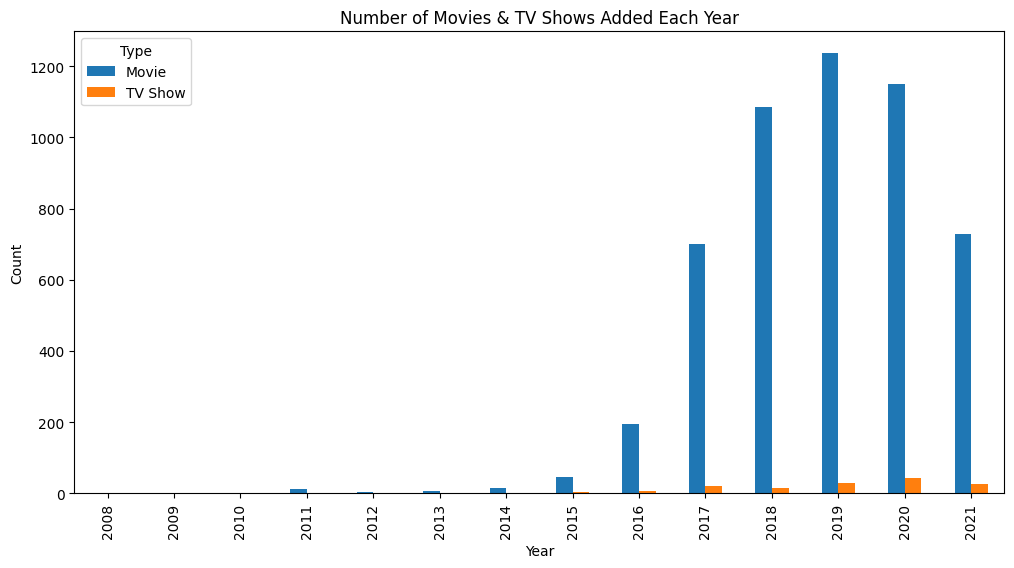

In [35]:
# prompt: 연도별 Movie & TV show 수치 시각화

import matplotlib.pyplot as plt
# 연도별 Movie & TV Show 수치 시각화
year_type_counts = df.groupby(['year_added', 'type'])['show_id'].count().unstack()

year_type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Movies & TV Shows Added Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()


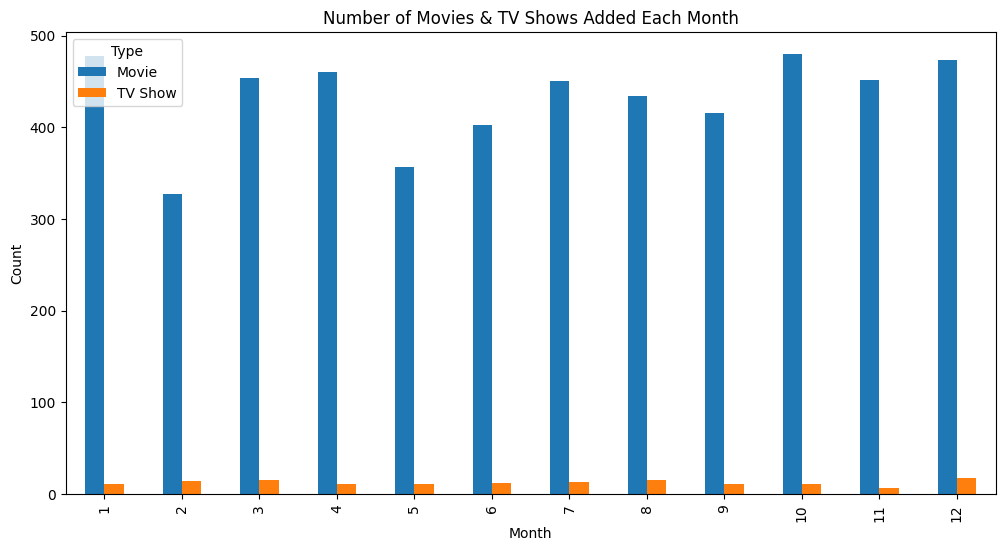

In [36]:
# prompt: 월별 Movie & TV show 수치 시각화

import matplotlib.pyplot as plt
# 월별 Movie & TV Show 수치 시각화
month_type_counts = df.groupby(['month_added', 'type'])['show_id'].count().unstack()

month_type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Movies & TV Shows Added Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()
